In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df  =  pd.read_csv('/content/drive/MyDrive/admission_predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


**Data Understanding**

In [4]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
df.rename(columns={'Serial No.': 'Serial NO'}, inplace=True)
df.rename(columns={'Chance of Admit ':'Chance of Admit'},inplace = True)
df.rename(columns={'GRE Score': 'GRE_score'}, inplace=True)
df.rename(columns={'LOR ':'LOR'},inplace=True)

In [6]:
df.columns

Index(['Serial NO', 'GRE_score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial NO          500 non-null    int64  
 1   GRE_score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [8]:
df.isnull().sum()

Serial NO            0
GRE_score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df['GRE_score'].unique()

array([337, 324, 316, 322, 314, 330, 321, 308, 302, 323, 325, 327, 328,
       307, 311, 317, 319, 318, 303, 312, 334, 336, 340, 298, 295, 310,
       300, 338, 331, 320, 299, 304, 313, 332, 326, 329, 339, 309, 315,
       301, 296, 294, 306, 305, 290, 335, 333, 297, 293])

In [11]:
df['GRE_score'].value_counts()

312    24
324    23
316    18
321    17
322    17
327    17
311    16
320    16
314    16
317    15
325    15
315    13
308    13
323    13
326    12
319    12
313    12
304    12
300    12
318    12
305    11
301    11
310    11
307    10
329    10
299    10
298    10
331     9
340     9
328     9
309     9
334     8
332     8
330     8
306     7
302     7
297     6
296     5
295     5
336     5
303     5
338     4
335     4
333     4
339     3
337     2
290     2
294     2
293     1
Name: GRE_score, dtype: int64

In [12]:
df['TOEFL Score'].unique()

array([118, 107, 104, 110, 103, 115, 109, 101, 102, 108, 106, 111, 112,
       105, 114, 116, 119, 120,  98,  93,  99,  97, 117, 113, 100,  95,
        96,  94,  92])

In [13]:
df['TOEFL Score'].value_counts()

110    44
105    37
104    29
107    28
106    28
112    28
103    25
100    24
102    24
99     23
101    20
111    20
108    19
113    19
109    19
114    18
116    16
115    11
118    10
98     10
119    10
120     9
117     8
97      7
96      6
95      3
93      2
94      2
92      1
Name: TOEFL Score, dtype: int64

In [14]:
df['University Rating'].unique()

array([4, 3, 2, 5, 1])

In [15]:
df['University Rating'].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

In [16]:
df['SOP'].unique()

array([4.5, 4. , 3. , 3.5, 2. , 5. , 1.5, 1. , 2.5])

In [17]:
df['SOP'].value_counts()

4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: SOP, dtype: int64

In [18]:
df['LOR'].unique()

array([4.5, 3.5, 2.5, 3. , 4. , 1.5, 2. , 5. , 1. ])

In [19]:
df['LOR'].value_counts()

3.0    99
4.0    94
3.5    86
4.5    63
2.5    50
5.0    50
2.0    46
1.5    11
1.0     1
Name: LOR, dtype: int64

In [20]:
df['CGPA'].unique()

array([9.65, 8.87, 8.  , 8.67, 8.21, 9.34, 8.2 , 7.9 , 8.6 , 8.4 , 9.  ,
       9.1 , 8.3 , 8.7 , 8.8 , 8.5 , 9.5 , 9.7 , 9.8 , 9.6 , 7.5 , 7.2 ,
       7.3 , 8.1 , 9.4 , 9.2 , 7.8 , 7.7 , 9.3 , 8.85, 7.4 , 7.6 , 6.8 ,
       8.92, 9.02, 8.64, 9.22, 9.16, 9.64, 9.76, 9.45, 9.04, 8.9 , 8.56,
       8.72, 8.22, 7.54, 7.36, 8.02, 9.36, 8.66, 8.42, 8.28, 8.14, 8.76,
       7.92, 7.66, 8.03, 7.88, 7.84, 8.96, 9.24, 8.88, 8.46, 8.12, 8.25,
       8.47, 9.05, 8.78, 9.18, 9.46, 9.38, 8.48, 8.68, 8.34, 8.45, 8.62,
       7.46, 7.28, 8.84, 9.56, 9.48, 8.36, 9.32, 8.71, 9.35, 8.65, 9.28,
       8.77, 8.16, 9.08, 9.12, 9.15, 9.44, 9.92, 9.11, 8.26, 9.43, 9.06,
       8.75, 8.89, 8.69, 7.86, 9.01, 8.97, 8.33, 8.27, 7.98, 8.04, 9.07,
       9.13, 9.23, 8.32, 8.98, 8.94, 9.53, 8.52, 8.43, 8.54, 9.91, 9.87,
       7.65, 7.89, 9.14, 9.66, 9.78, 9.42, 9.26, 8.79, 8.23, 8.53, 8.07,
       9.31, 9.17, 9.19, 8.37, 7.68, 8.15, 8.73, 8.83, 8.57, 9.68, 8.09,
       8.17, 7.64, 8.01, 7.95, 8.49, 7.87, 7.97, 8.

In [21]:
df['CGPA'].value_counts()

8.76    9
8.00    9
8.12    7
8.45    7
8.54    7
       ..
9.92    1
9.35    1
8.71    1
9.32    1
7.69    1
Name: CGPA, Length: 184, dtype: int64

In [22]:
df['Research'].unique()

array([1, 0])

In [23]:
df['Research'].value_counts()

1    280
0    220
Name: Research, dtype: int64

In [24]:
df['Chance of Admit'].unique()

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.63, 0.64, 0.7 , 0.94, 0.95,
       0.97, 0.44, 0.46, 0.74, 0.91, 0.88, 0.58, 0.48, 0.49, 0.53, 0.87,
       0.86, 0.89, 0.82, 0.56, 0.36, 0.42, 0.47, 0.55, 0.57, 0.96, 0.93,
       0.38, 0.34, 0.79, 0.71, 0.69, 0.59, 0.85, 0.77, 0.81, 0.83, 0.67,
       0.73, 0.6 , 0.43, 0.51, 0.39, 0.37])

In [25]:
df['Chance of Admit'].value_counts()

0.71    23
0.64    19
0.73    18
0.72    16
0.79    16
        ..
0.38     2
0.36     2
0.43     1
0.39     1
0.37     1
Name: Chance of Admit, Length: 61, dtype: int64

In [26]:
continous = ['GRE_score','TOEFL Score','CGPA','SOP','LOR','Chance of Admit']
discrete_categorical = ['Research']
discrete_count = ['University Rating']

**EDA (Exploratory data Analysis)**

In [27]:
df[continous].describe()

,GRE_score,TOEFL Score,CGPA,SOP,LOR,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.00000
mean,316.472000,107.192000,8.576440,3.374000,3.48400,0.72174
std,11.295148,6.081868,0.604813,0.991004,0.92545,0.14114
min,290.000000,92.000000,6.800000,1.000000,1.00000,0.34000
25%,308.000000,103.000000,8.127500,2.500000,3.00000,0.63000
50%,317.000000,107.000000,8.560000,3.500000,3.50000,0.72000
75%,325.000000,112.000000,9.040000,4.000000,4.00000,0.82000
max,340.000000,120.000000,9.920000,5.000000,5.00000,0.97000


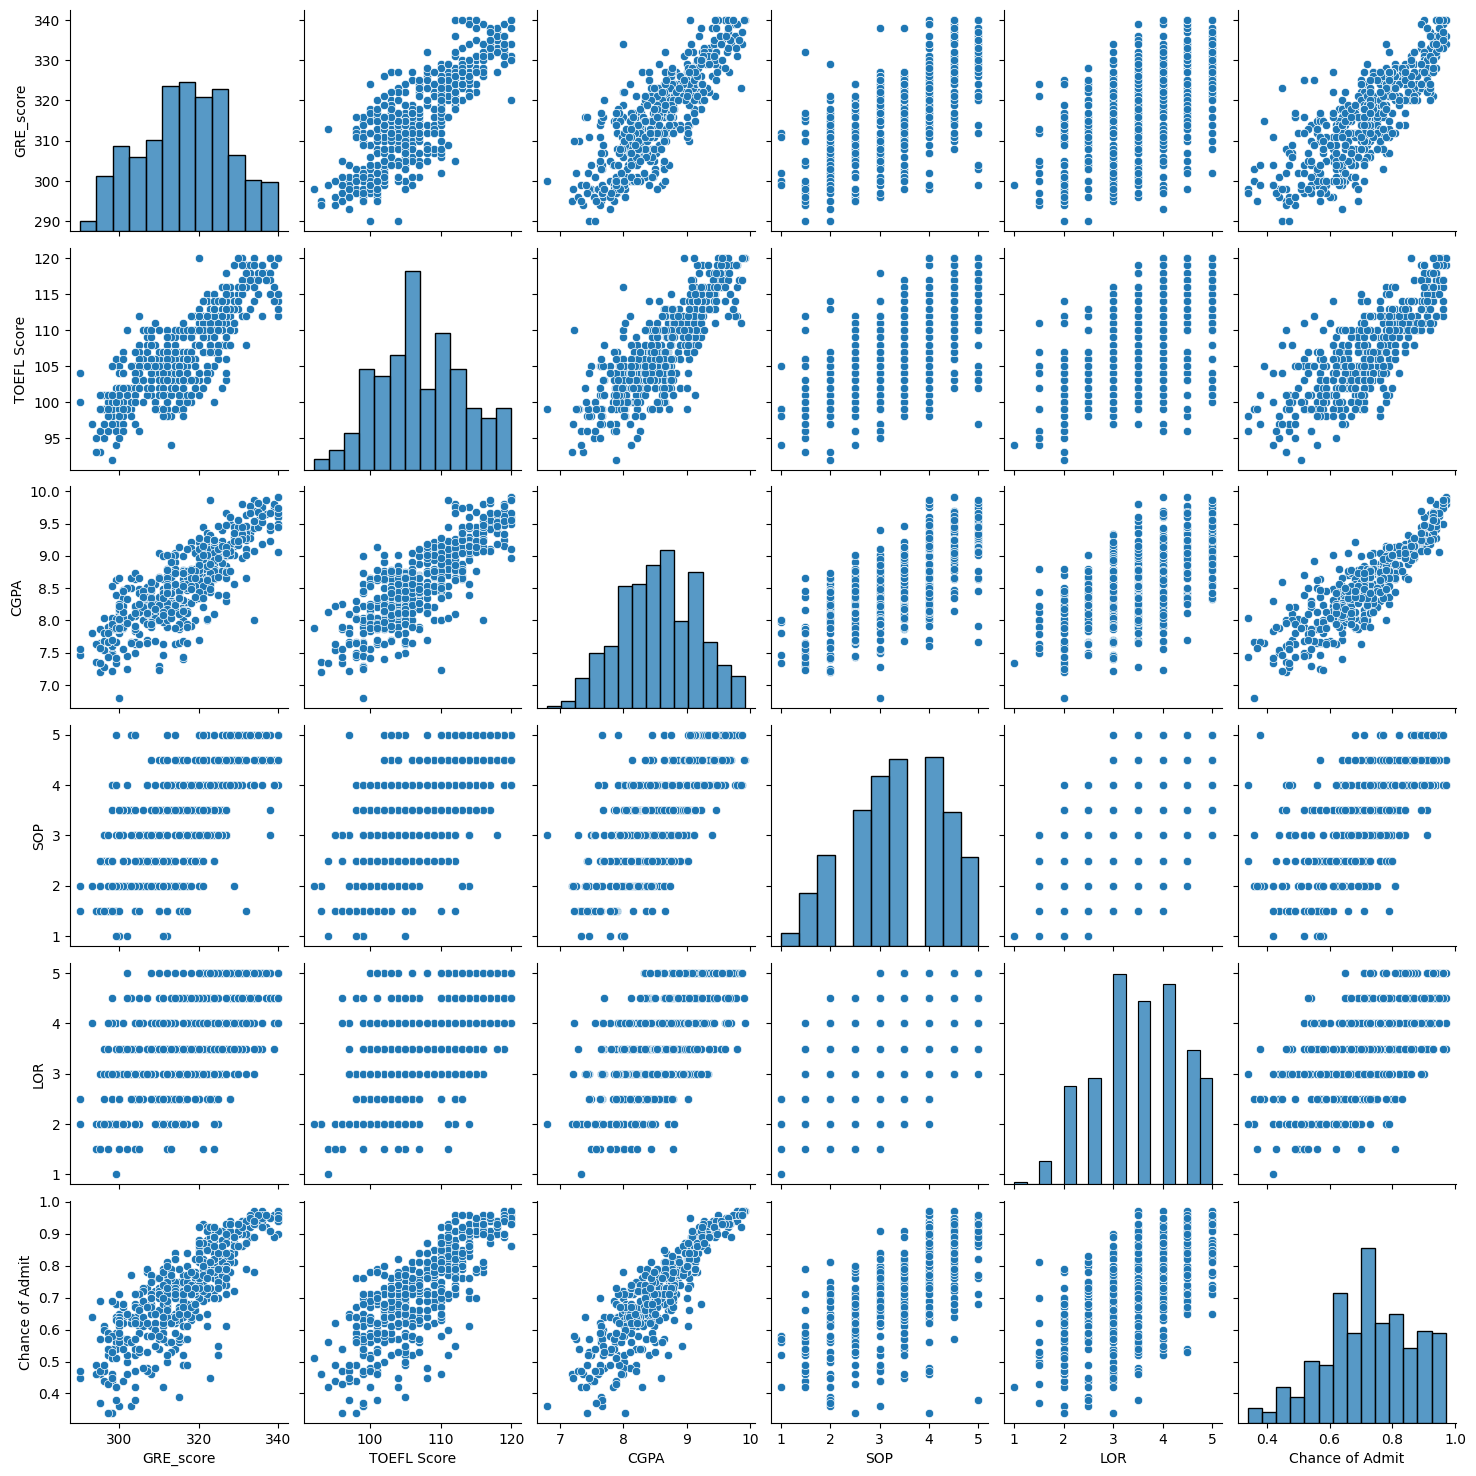

In [28]:
sns.pairplot(df[continous])
plt.show()

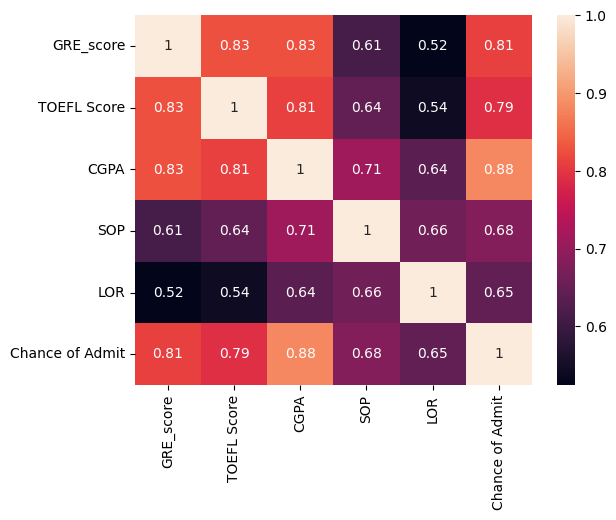

In [29]:
sns.heatmap(df[continous].corr(),annot=True)
plt.show()

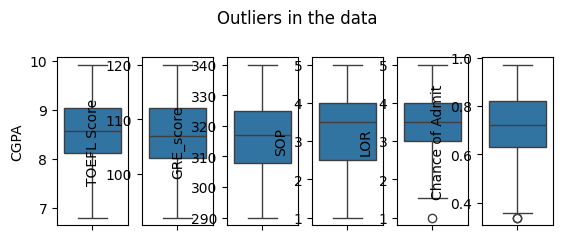

In [30]:
plt.subplot(2,6,1)
sns.boxplot(df['CGPA'])
plt.subplot(2,6,2)
sns.boxplot(df['TOEFL Score'])
plt.subplot(2,6,3)
sns.boxplot(df['GRE_score'])
plt.subplot(2,6,4)
sns.boxplot(df['SOP'])
plt.subplot(2,6,5)
sns.boxplot(df['LOR'])
plt.subplot(2,6,6)
sns.boxplot(df['Chance of Admit'])
plt.suptitle('Outliers in the data')
plt.show()

In [31]:
df[discrete_categorical].describe()

,Research
count,500.000000
mean,0.560000
std,0.496884
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


**Data preparation**

In [32]:
df.isnull().sum()

Serial NO            0
GRE_score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [33]:
Q1 = df['LOR'].quantile(0.25)
print('Q1:','Q1')

Q3 = df['LOR'].quantile(0.75)
print('Q3:','Q3')

IQR = Q3-Q1
print('IQR:', 'IQR')

lower_limit = Q1-(IQR*1.5)
print('lower_limit :',lower_limit )
upper_limit = Q3+(IQR*1.5)
print('upper_limit :',upper_limit )

Q1: Q1
Q3: Q3
IQR: IQR
lower_limit : 1.5
upper_limit : 5.5


In [34]:
df[(df['LOR']<lower_limit) | (df['LOR']>upper_limit)]

,Serial NO,GRE_score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
347,348,299,94,1,1.0,1.0,7.34,0,0.42


In [35]:
Q1 = df['Chance of Admit'].quantile(0.25)
print('Q1:','Q1')

Q3 = df['Chance of Admit'].quantile(0.75)
print('Q3:','Q3')

IQR = Q3-Q1
print('IQR:', 'IQR')

lower_limit = Q1-(IQR*1.5)
print('lower_limit :',lower_limit )
upper_limit = Q3+(IQR*1.5)
print('upper_limit :',upper_limit )

Q1: Q1
Q3: Q3
IQR: IQR
lower_limit : 0.3450000000000001
upper_limit : 1.105


In [36]:
df[(df['Chance of Admit']<lower_limit) | (df['Chance of Admit']>upper_limit)]

,Serial NO,GRE_score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
92,93,298,98,2,4.0,3.0,8.03,0,0.34
376,377,297,96,2,2.5,2.0,7.43,0,0.34


In [37]:
df[continous].skew()

GRE_score         -0.039842
TOEFL Score        0.095601
CGPA              -0.026613
SOP               -0.228972
LOR               -0.145290
Chance of Admit   -0.289966
dtype: float64

**# X & Y**

In [38]:

X = df.drop(columns=['Chance of Admit','Research','Serial NO'],axis=1)

y = df['Chance of Admit']

**Hyper tuning for best Random state number**

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=5)

In [40]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

print('Intercept:' , model.intercept_)
print('coefficients:', model.coef_)

ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

print('Train R2: ', model.score(X_train,y_train))
print('Test R2: ', model.score(X_test,y_test))

from sklearn.model_selection import cross_val_score
print('CV Score: ', cross_val_score(model,X,y,cv=5).mean())




Intercept: -1.4397610409324817
coefficients: [ 0.00229831  0.00254724  0.00807077 -0.00078758  0.017978    0.12522938]
Train R2:  0.8167010453783331
Test R2:  0.8143902900011097
CV Score:  0.8090109217125605


**check for Assumptions**

**1.lineary of errors**

In [41]:
errors = y_test - ypred_test

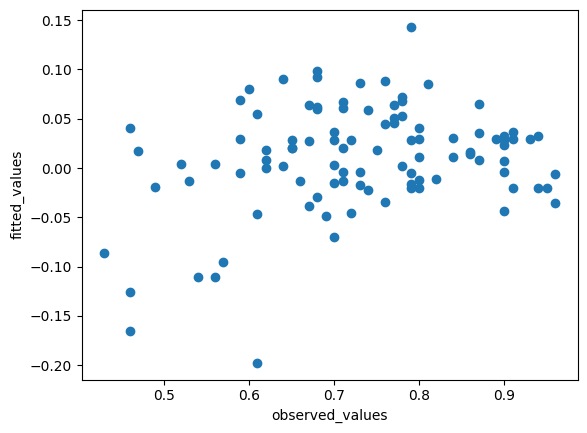

In [42]:
plt.scatter(y_test, errors)
plt.xlabel('observed_values')
plt.ylabel('fitted_values')
plt.show()

**2.Normality of Errors**

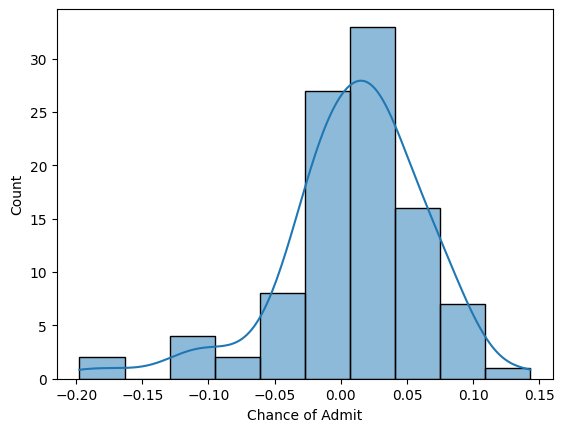

In [43]:
sns.histplot(errors,bins=10,kde=True)
plt.show()

**3.Equal variance of Errors (Homoscadesicity)**

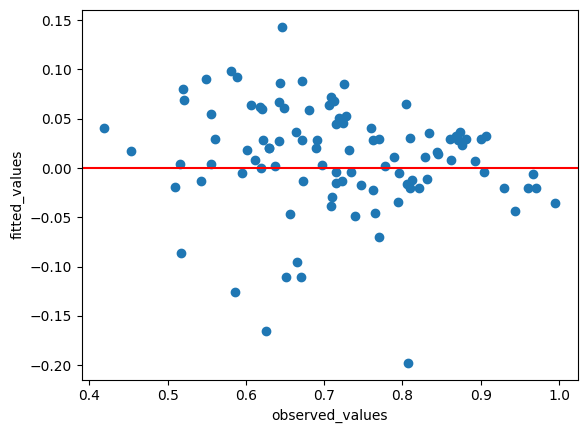

In [44]:
plt.scatter(ypred_test, errors)
plt.axhline(y=0,color = 'red')
plt.xlabel('observed_values')
plt.ylabel('fitted_values')
plt.show()

**4. Variable significance**

In [45]:
import statsmodels.formula.api as smf
model1 = smf.ols('y~X' , data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     366.8
Date:                Mon, 12 Feb 2024   Prob (F-statistic):          3.22e-178
Time:                        05:52:13   Log-Likelihood:                 694.60
No. Observations:                 500   AIC:                            -1375.
Df Residuals:                     493   BIC:                            -1346.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4268      0.097    -14.695      0.000      -1.618      -1.236
X[0]           0.0024      0.000      4.897      0.000       0.001       0.003
X[1]           0.0026      0.001      2.974      0.003       0.001       0.004
X[2]           0.0067      0.004      1.747      0.081      -0.001       0.014
X[3]           0.0019      0.005      0.417      0.677      -0.007       0.011
X[4]           0.0177      0.004      4.231      0.000       0.009       0.026
X[5]           0.1192      0.010     12.137      0.000       0.100       0.139
==============================================================================
Omnibus:                      119.023   Durbin-Watson:                   0.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              299.923
Skew:                          -1.187   Prob(JB):                     7.46e-66
Kurtosis:                       5.959   Cond. No.                     1.20e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Added variable plot

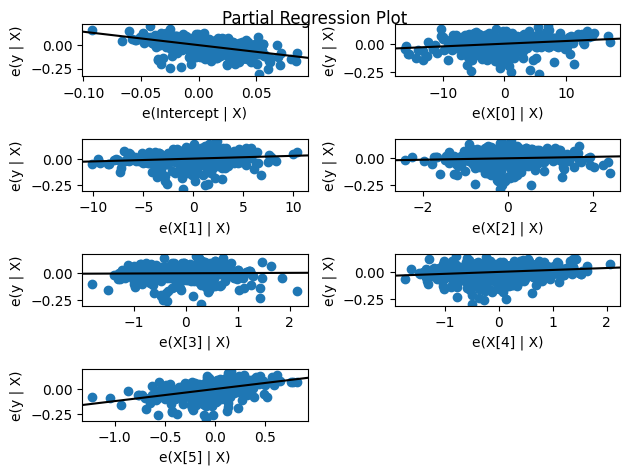

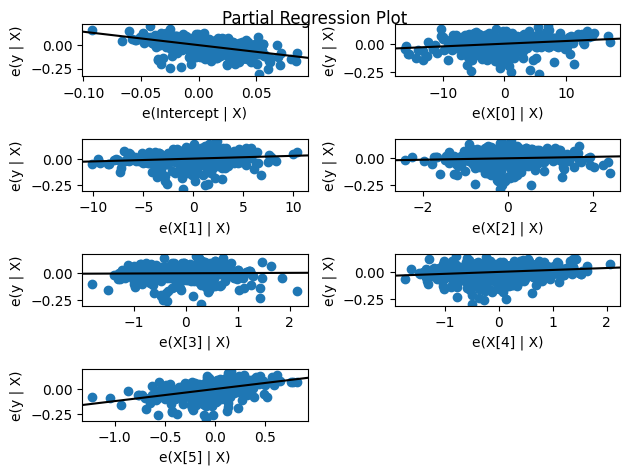

In [46]:
import statsmodels.api as sm
sm.graphics.plot_partregress_grid(model1)

In [47]:
X.columns

Index(['GRE_score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA'], dtype='object')

**Final Model**

In [48]:
X = df[['GRE_score','LOR','CGPA']]
y = df['Chance of Admit']

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=5)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

print('Intercept: ', model.intercept_)
print('Coefficients: ',model.coef_)

ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

print('Train R2: ', model.score(X_train,y_train))
print('Test R2: ', model.score(X_test,y_test))

from sklearn.model_selection import cross_val_score
print('CV Score: ', cross_val_score(model,X,y,cv=5).mean())



Intercept:  -1.5361838624748136
Coefficients:  [0.0030709  0.02141319 0.14099338]
Train R2:  0.8113905706650558
Test R2:  0.8066832515988903
CV Score:  0.807769687957461


In [50]:
df[['GRE_score','LOR','CGPA']].corr()

,GRE_score,LOR,CGPA
GRE_score,1.000000,0.524679,0.825878
LOR,0.524679,1.000000,0.637469
CGPA,0.825878,0.637469,1.000000


Calculating VIF's values of Independent variables

In [51]:
rsq_GRE_score = smf.ols('GRE_score ~ LOR+CGPA' , data = df).fit().rsquared
vif_GRE_score = 1/(1-rsq_GRE_score)

rsq_LOR= smf.ols('LOR~GRE_score+CGPA' , data = df).fit().rsquared
vif_LOR = 1/(1-rsq_LOR)

rsq_CGPA = smf.ols('CGPA~LOR+GRE_score' , data = df).fit().rsquared
vif_CGPA = 1/(1-rsq_CGPA)

#  Stoeing vif values in a data frame

d1 = {'Variables ': ['GRE_score','CGPA','LOR'], 'VIF': [vif_GRE_score,vif_CGPA,vif_LOR]}
vif_frame = pd.DataFrame(d1)
vif_frame


,Variables,VIF
0,GRE_score,3.145443
1,CGPA,3.839980
2,LOR,1.684571


In [52]:
model.predict(X_test)

array([0.62921538, 0.77935147, 0.7666999 , 0.97084395, 0.70487522,
       0.72270308, 0.58408515, 0.69260554, 0.60184142, 0.78377385,
       0.54181263, 0.44745084, 0.90097859, 0.79505332, 0.72677814,
       0.59420573, 0.66056891, 0.89884103, 0.75813086, 0.81645337,
       0.8137043 , 0.63086401, 0.82731471, 0.81810199, 0.97880148,
       0.67085737, 0.62673049, 0.68670163, 0.64268418, 0.52153365,
       0.62283568, 0.68404885, 0.8763529 , 0.71431348, 0.81081363,
       0.82890488, 0.557773  , 0.71315539, 0.58193445, 0.8593374 ,
       0.76418953, 0.63047136, 0.79993995, 0.85835874, 0.64771241,
       0.96908669, 0.99738165, 0.67898199, 0.69161374, 0.51987268,
       0.72718392, 0.76526448, 0.70380107, 0.42771176, 0.52043241,
       0.88249471, 0.85204904, 0.79339235, 0.53090031, 0.71025237,
       0.76286354, 0.62237892, 0.66140676, 0.58848285, 0.59031091,
       0.64356655, 0.56938745, 0.78350967, 0.64822763, 0.70304716,
       0.84440101, 0.50586963, 0.57726104, 0.71141047, 0.67232

In [53]:
test_data = pd.DataFrame({'GRE_score':[330],'LOR':[4.7],'CGPA':[9.7]})
#print(test_data)
print('admission will come r not:' , model.predict(test_data)[0])

admission will come r not: 0.9454924890954421


**PolyNomial Regression**

**# Modelling - Polynomial Regression**

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=5)

In [55]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=2)
X_train_poly = pd.DataFrame(polynomial_converter.fit_transform(X_train))
X_test_poly = pd.DataFrame(polynomial_converter.transform(X_test))

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_poly,y_train)

ypred_train = model.predict(X_train_poly)
ypred_test = model.predict(X_test_poly)

from sklearn.metrics import mean_squared_error , r2_score
print('Train RMSE: ', np.sqrt(mean_squared_error(y_train,ypred_train)))
print('Train R2: ', r2_score(y_train,ypred_train))

from sklearn.model_selection import cross_val_score
print('CV Score: ', cross_val_score(model,X_train_poly,y_train,cv=5).mean())

print('Test RMSE: ', np.sqrt(mean_squared_error(y_test,ypred_test)))
print('Test R2: ', r2_score(y_test,ypred_test))



Train RMSE:  0.06228826796031012
Train R2:  0.8129425914216452
CV Score:  0.7968463108772217
Test RMSE:  0.055990182021021316
Test R2:  0.8082745764784213


**HyperParameterTuning**

**choosing the best polynomial degree for given dataset**

In [56]:
train_r2 = []
test_r2 = []

for i in range(1,10):
  polynomial_converter = PolynomialFeatures(degree=i)
  X_train_poly = pd.DataFrame(polynomial_converter.fit_transform(X_train))

  model = LinearRegression()
  model.fit(X_train_poly,y_train)

  ypred_train = model.predict(X_train_poly)
  train_r2.append(model.score(X_train_poly,y_train))

  X_test_poly = pd.DataFrame(polynomial_converter.transform(X_test))

  ypred_test = model.predict(X_test_poly)
  test_r2.append(model.score(X_test_poly,y_test))



In [57]:
train_r2

[0.811390570665056,
 0.8129425914216452,
 0.8174765366866474,
 0.8276514849594441,
 0.8241749998037379,
 0.825224320838579,
 0.8234774097656032,
 0.8247965484169426,
 0.8284989329371953]

In [58]:
test_r2

[0.8066832515988904,
 0.8082745764784213,
 0.7839021298393715,
 0.779691432522639,
 0.7107824986359028,
 0.7067847175955236,
 0.6968443035224721,
 0.6583176823446617,
 0.6524805522259625]

In [59]:
# Degree 2 is best model for Polunomial regression
# Already i have done above


**Predicition on New data**

In [60]:
test_data = pd.DataFrame({'GRE_score':[330],'LOR':[4.7],'CGPA':[9.7]})
#print(test_data)

transformed_data = polynomial_converter.transform(test_data)
print('admission will come r not:' , model.predict(transformed_data)[0])

admission will come r not: 0.9652433233848008
